In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

In [2]:
dice_data = np.array([1, 2, 3, 4, 5, 6])

# 統計確率
caloc_steps = 1000

# サイコロを振る
dice_rolls = np.random.choice(dice_data, size=caloc_steps)
# サイコロの目の出現の割合を計算
for i in range(1, 7):
    print(f"目{i}の出現割合: {np.mean(dice_rolls == i):.3f}")


目1の出現割合: 0.171
目2の出現割合: 0.157
目3の出現割合: 0.157
目4の出現割合: 0.183
目5の出現割合: 0.161
目6の出現割合: 0.171


In [3]:
# practice 4-1

coin_data = np.array([0, 1])  # 0: 表, 1: 裏

# コインを振る回数
caloc_steps = 1000

# コインを振る
coin_flips = np.random.choice(coin_data, size=caloc_steps)
# 表の出現割合を計算
print(f"表の出現割合: {np.mean(coin_flips == 0):.3f}")
print(f"裏の出現割合: {np.mean(coin_flips == 1):.3f}")

表の出現割合: 0.488
裏の出現割合: 0.512


In [4]:
# Practice 4-2
# ふたりともあたりを引く確率
print(100 / 1000 * 99 / 999)

0.009909909909909911


In [8]:
# practice 4-3
# 全体の陽性確率
p_yosei = 0.001 * 0.99 + 0.999 * 0.01
print(f"全体の陽性確率: {p_yosei:.3f}")

# 陽性の人が病気である確率
p_byosei = 0.001 * 0.99 / p_yosei

print(f"陽性の人が病気である確率: {p_byosei:.3f}")

全体の陽性確率: 0.011
陽性の人が病気である確率: 0.090


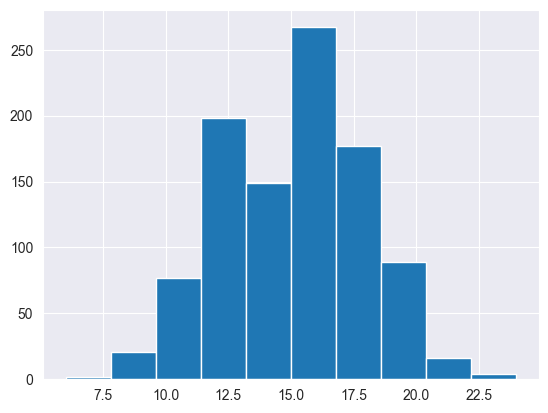

In [10]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(n=30, p=0.5, size=1000)
plt.hist(x)
plt.grid(True)

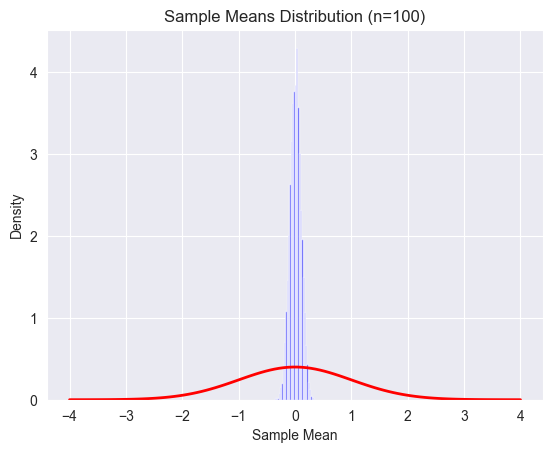

In [11]:
# Practice 4-4
# 平均0, 分散1の正規分布からn=100の標本抽出を10000回行いヒストグラムを記載する
np.random.seed(0)
n = 100
x = np.random.normal(loc=0, scale=1, size=(10000, n))
# 標本平均を計算
sample_means = np.mean(x, axis=1)
# ヒストグラムを描画
plt.hist(sample_means, bins=30, density=True, alpha=0.7, color='blue')
# 正規分布の理論値を描画
x_values = np.linspace(-4, 4, 100)
y_values = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_values**2)
plt.plot(x_values, y_values, color='red', linewidth=2)
plt.title('Sample Means Distribution (n=100)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)


In [12]:
# zipを扱うためのライブラリを追加
import requests, zipfile
from io import StringIO
import io
import os

print(os.getcwd())

/Users/kouhei/Program/ML/data-scientist-training-course/src/chapter4


In [13]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)

# zipfileの読み込み
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('./data')

In [14]:
# データの読み込み
student_data_math = pd.read_csv('./data/student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [44]:
student_data_por = pd.read_csv('./data/student-por.csv', sep=';')
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


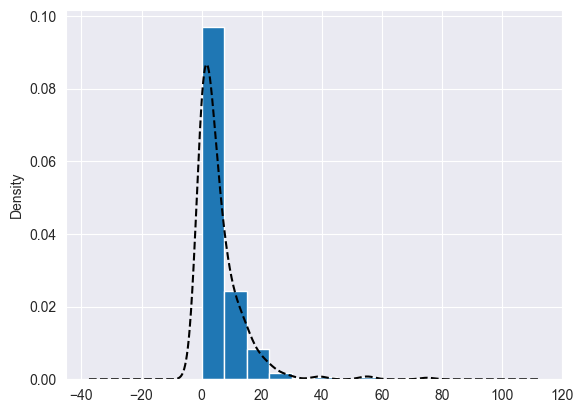

In [16]:
# カーネル密度関数

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで、確率で表示
student_data_math.absences.hist(density=True)
plt.grid(True)

<Axes: ylabel='Density'>

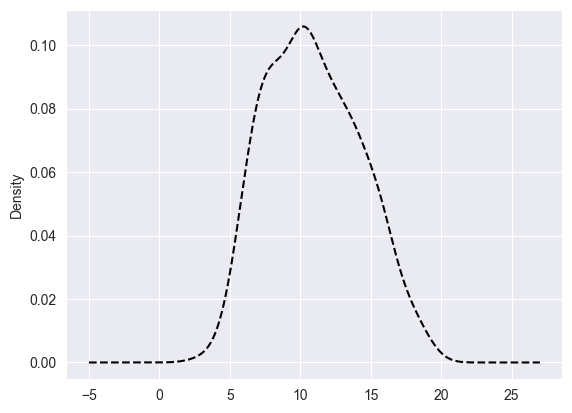

In [17]:
# G1のヒストグラムとカーネル密度関数を描画
student_data_math.G1.plot(kind='kde', style='k--')

In [23]:
# 必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y


In [24]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になります
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)




<Figure size 640x480 with 0 Axes>

In [25]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更。sciが指数表示、axisで軸を指定、scilimits=(n, m) はnからmの外にあるものは指数表記
# scilimits=(0,0) はすべて指数表記にするという意味
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

<Figure size 640x480 with 0 Axes>

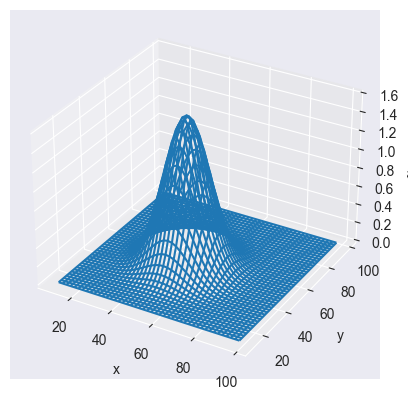

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D  # 実は不要（projection='3d' で代用できる）

# グリッドデータ作成
x, y = np.mgrid[10:100:2, 10:100:2]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

# 多変量正規分布（平均50, 共分散100）
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])
z = rv.pdf(pos)

# ✅ 修正ポイント：Axes3Dを使わず projection='3d' を指定
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')  # ← ここが重要

ax.plot_wireframe(x, y, z)

# ラベル設定
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸を指数表記に
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

plt.show()

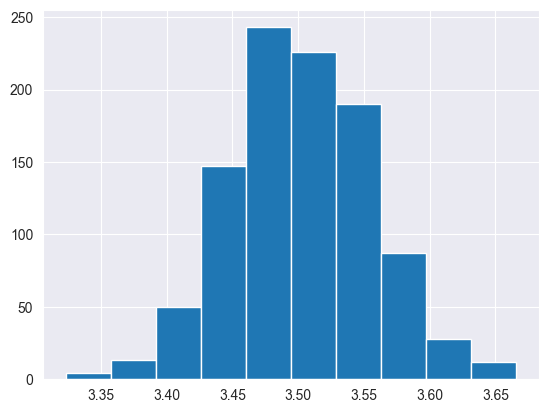

In [37]:
# 中心極限定理
def function_central_theory(N):

    sample_array = np.array([1, 2, 3, 4, 5, 6])
    number_cnt = np.arange(1, N + 1) * 1.0

    mean_array = np.array([])

    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)

    plt.hist(mean_array)
    plt.grid(True)

function_central_theory(1000)

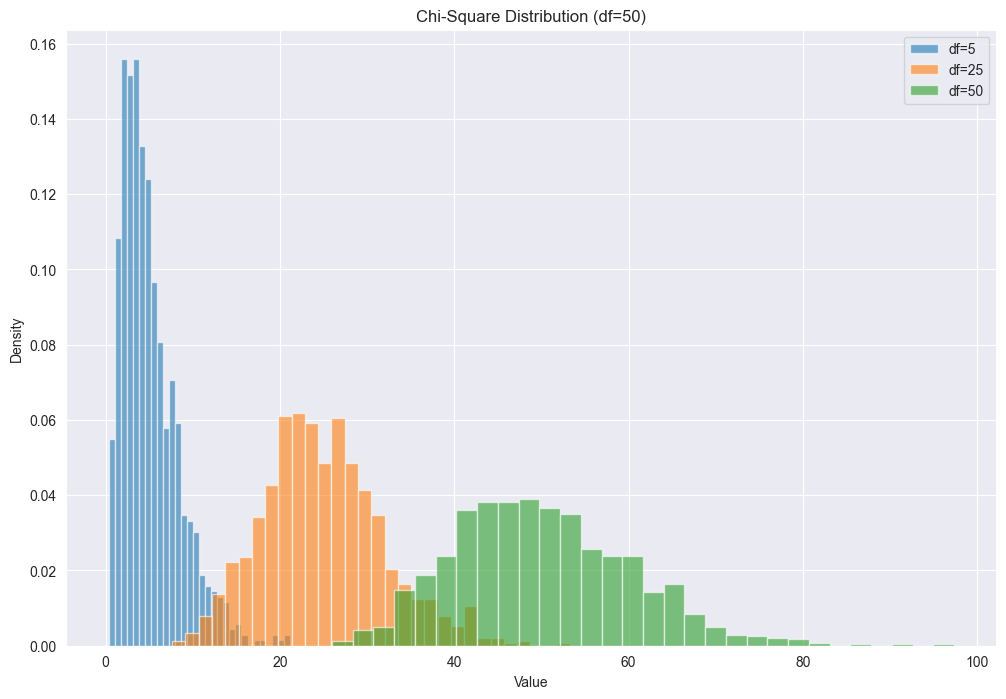

In [41]:
# 自由度5, 25, 50のカイ二乗分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。
def chi_square_distribution_histogram(degrees_of_freedom, num_samples=1000):
    # カイ二乗分布の乱数を生成
    chi_square_samples = np.random.chisquare(degrees_of_freedom, num_samples)
    
    # ヒストグラムを描画
    plt.hist(chi_square_samples, bins=30, density=True, alpha=0.6, label=f'df={degrees_of_freedom}')
    plt.title(f'Chi-Square Distribution (df={degrees_of_freedom})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

# 自由度5, 25, 50のカイ二乗分布のヒストグラムを描画
plt.figure(figsize=(12, 8))
chi_square_distribution_histogram(5)
chi_square_distribution_histogram(25)
chi_square_distribution_histogram(50)


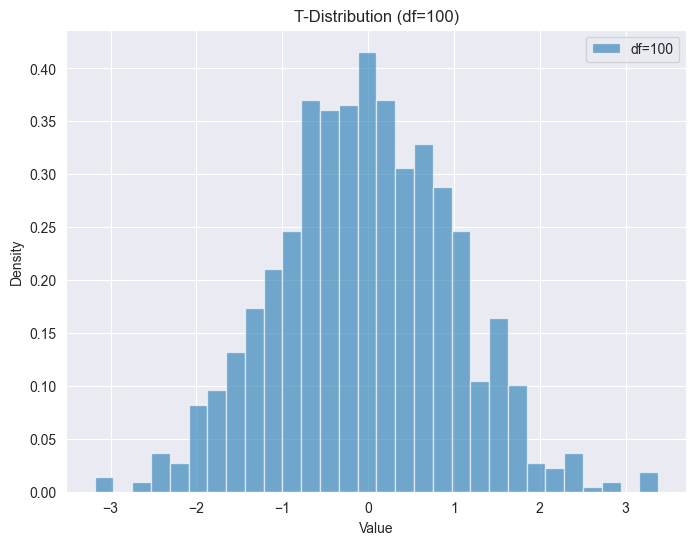

In [42]:
# Practice 4-8 
# 自由度100のt分布からの乱数を1000個発生させて、ヒストグラムを書いてください。
def t_distribution_histogram(degrees_of_freedom, num_samples=1000):
    # t分布の乱数を生成
    t_samples = np.random.standard_t(degrees_of_freedom, num_samples)
    
    # ヒストグラムを描画
    plt.hist(t_samples, bins=30, density=True, alpha=0.6, label=f'df={degrees_of_freedom}')
    plt.title(f'T-Distribution (df={degrees_of_freedom})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
# 自由度100のt分布のヒストグラムを描画
plt.figure(figsize=(8, 6))
t_distribution_histogram(100)


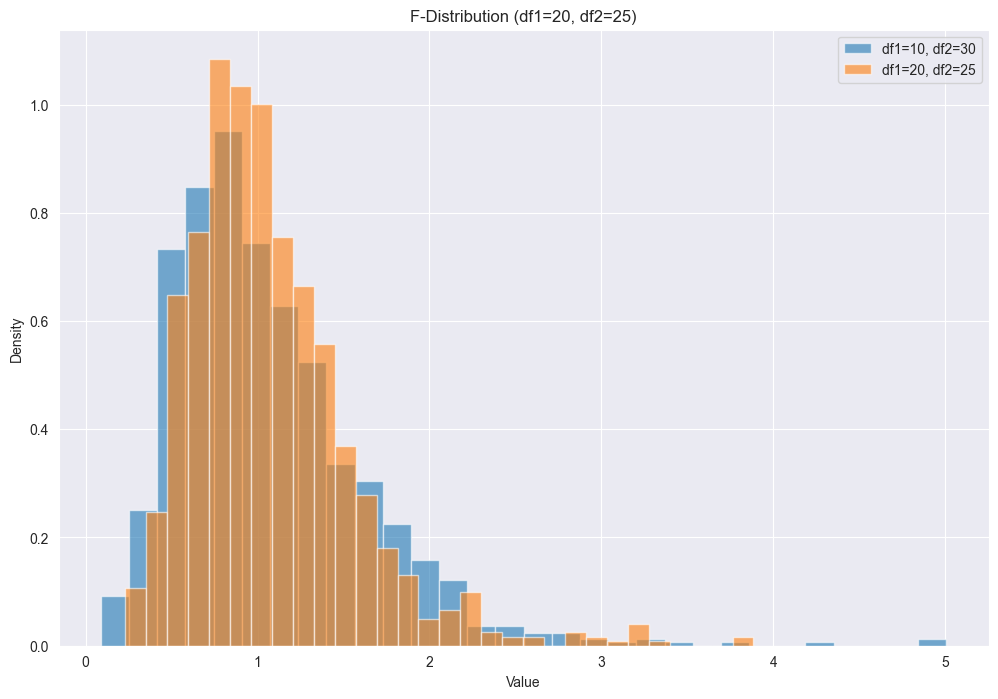

In [43]:
# practice 4-9
# 自由度 (10, 30), (20, 25)のF分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

def f_distribution_histogram(df1, df2, num_samples=1000):
    # F分布の乱数を生成
    f_samples = np.random.f(df1, df2, num_samples)
    
    # ヒストグラムを描画
    plt.hist(f_samples, bins=30, density=True, alpha=0.6, label=f'df1={df1}, df2={df2}')
    plt.title(f'F-Distribution (df1={df1}, df2={df2})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

# 自由度 (10, 30) のF分布のヒストグラムを描画
plt.figure(figsize=(12, 8))
f_distribution_histogram(10, 30)
# 自由度 (20, 25) のF分布のヒストグラムを描画
f_distribution_histogram(20, 25)


In [45]:
# chapter 4-7
student_data_merge = pd.merge(student_data_math
                            , student_data_por
                            , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                  , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                            , suffixes=('_math', '_por'))

print('G1数学の成績平均：', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均：', student_data_merge.G1_por.mean())



G1数学の成績平均： 10.861256544502618
G1ポルトガル語の成績平均： 12.112565445026178


In [47]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p値:', p)

p値: 1.6536555217101022e-16


In [50]:
print('G2数学の成績平均：', student_data_merge.G2_math.mean())
print('G2ポルトガル語の成績平均：', student_data_merge.G2_por.mean())
t, p = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print('p値:', p)

G2数学の成績平均： 10.712041884816754
G2ポルトガル語の成績平均： 12.238219895287958
p値: 4.0622824801348625e-19


In [52]:
print('数学の平均欠席数：', student_data_merge.absences_math.mean())
print('ポルトガル語の平均欠席数：', student_data_merge.absences_por.mean())

t, p = stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print('p値:', p)


数学の平均欠席数： 5.319371727748691
ポルトガル語の平均欠席数： 3.6727748691099475
p値: 2.3441656888384195e-06


In [54]:
print('数学の平均勉強時間：', student_data_merge.studytime_math.mean())
print('ポルトガル語の平均勉強時間：', student_data_merge.studytime_por.mean())

t, p = stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print('p値:', p)

数学の平均勉強時間： 2.0340314136125652
ポルトガル語の平均勉強時間： 2.0392670157068062
p値: 0.5643842756976525
